In [2]:
!pip install ucimlrepo

In [3]:
from ucimlrepo import fetch_ucirepo
data_cancer=fetch_ucirepo(id=17)
X=data_cancer.data.features
Y=data_cancer.data.targets
X.info()
print(Y.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   radius1             569 non-null    float64
 1   texture1            569 non-null    float64
 2   perimeter1          569 non-null    float64
 3   area1               569 non-null    float64
 4   smoothness1         569 non-null    float64
 5   compactness1        569 non-null    float64
 6   concavity1          569 non-null    float64
 7   concave_points1     569 non-null    float64
 8   symmetry1           569 non-null    float64
 9   fractal_dimension1  569 non-null    float64
 10  radius2             569 non-null    float64
 11  texture2            569 non-null    float64
 12  perimeter2          569 non-null    float64
 13  area2               569 non-null    float64
 14  smoothness2         569 non-null    float64
 15  compactness2        569 non-null    float64
 16  concavit

In [4]:
Y['Diagnosis'].unique()

array(['M', 'B'], dtype=object)

In [5]:
X.isnull().sum()

radius1               0
texture1              0
perimeter1            0
area1                 0
smoothness1           0
compactness1          0
concavity1            0
concave_points1       0
symmetry1             0
fractal_dimension1    0
radius2               0
texture2              0
perimeter2            0
area2                 0
smoothness2           0
compactness2          0
concavity2            0
concave_points2       0
symmetry2             0
fractal_dimension2    0
radius3               0
texture3              0
perimeter3            0
area3                 0
smoothness3           0
compactness3          0
concavity3            0
concave_points3       0
symmetry3             0
fractal_dimension3    0
dtype: int64

In [6]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest,chi2
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [7]:
le=LabelEncoder()
y_encoded=le.fit_transform(Y)
X_train,X_test,Y_train,Y_test=train_test_split(X,y_encoded,test_size=0.2,
                                               random_state=42)

C:\Users\itzsh\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\preprocessing\_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [8]:
select_features=SelectKBest(chi2,k=10)
X_train_selected=select_features.fit_transform(X_train,Y_train)
X_test_selected=select_features.transform(X_test)

In [9]:
print(X_train_selected.shape)
print(X_test_selected.shape)

(455, 10)
(114, 10)


In [10]:
lr_model=LogisticRegression(
penalty='l1',#elasticnet l1 and l2
C=1.0,
    fit_intercept=True,
    random_state=None,
    solver='liblinear',
    max_iter=1000,
    multi_class='auto',
    verbose=0,
    warm_start=False,
    n_jobs=None
)

In [11]:
lr_model.fit(X_train,Y_train)

C:\Users\itzsh\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(max_iter=1000, multi_class='auto', penalty='l1',
                   solver='liblinear')

In [12]:
y_pred=lr_model.predict(X_test)

In [13]:
from sklearn.metrics import classification_report,ConfusionMatrixDisplay,accuracy_score,confusion_matrix

In [14]:
accuracy=accuracy_score(Y_test,y_pred)
print("Accuracy is:",accuracy)

Accuracy is: 0.956140350877193


In [15]:
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97        71
           1       0.97      0.91      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



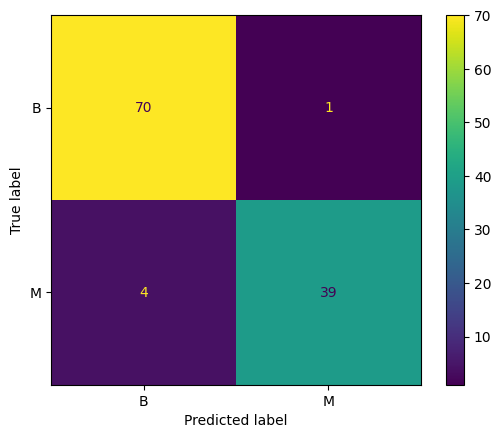

In [16]:
cm=confusion_matrix(Y_test,y_pred)
cmat=ConfusionMatrixDisplay(cm,display_labels=np.unique(Y).tolist())
cmat.plot()

In [17]:
from sklearn.tree import DecisionTreeClassifier,plot_tree
features_data=X.columns
dt=DecisionTreeClassifier(
criterion='gini',#or entropy
splitter='best',#None
max_depth=10,#or integer
min_samples_split=2,#minimum 2 sample to decide
min_samples_leaf=1,
max_features=None, #auto,sqrt,l2,None
random_state=None)

In [18]:
X_train,X_test,Y_train,Y_test=train_test_split(X,y_encoded,test_size=0.2,random_state=42)
X_train.shape

(455, 30)

In [19]:
dt.fit(X_train,Y_train)

DecisionTreeClassifier(max_depth=10)

In [20]:
y_pred_dt=dt.predict(X_test)

In [21]:
print(classification_report(Y_test,y_pred_dt))
print(accuracy_score(Y_test,y_pred_dt))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96        71
           1       0.93      0.93      0.93        43

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114

0.9473684210526315


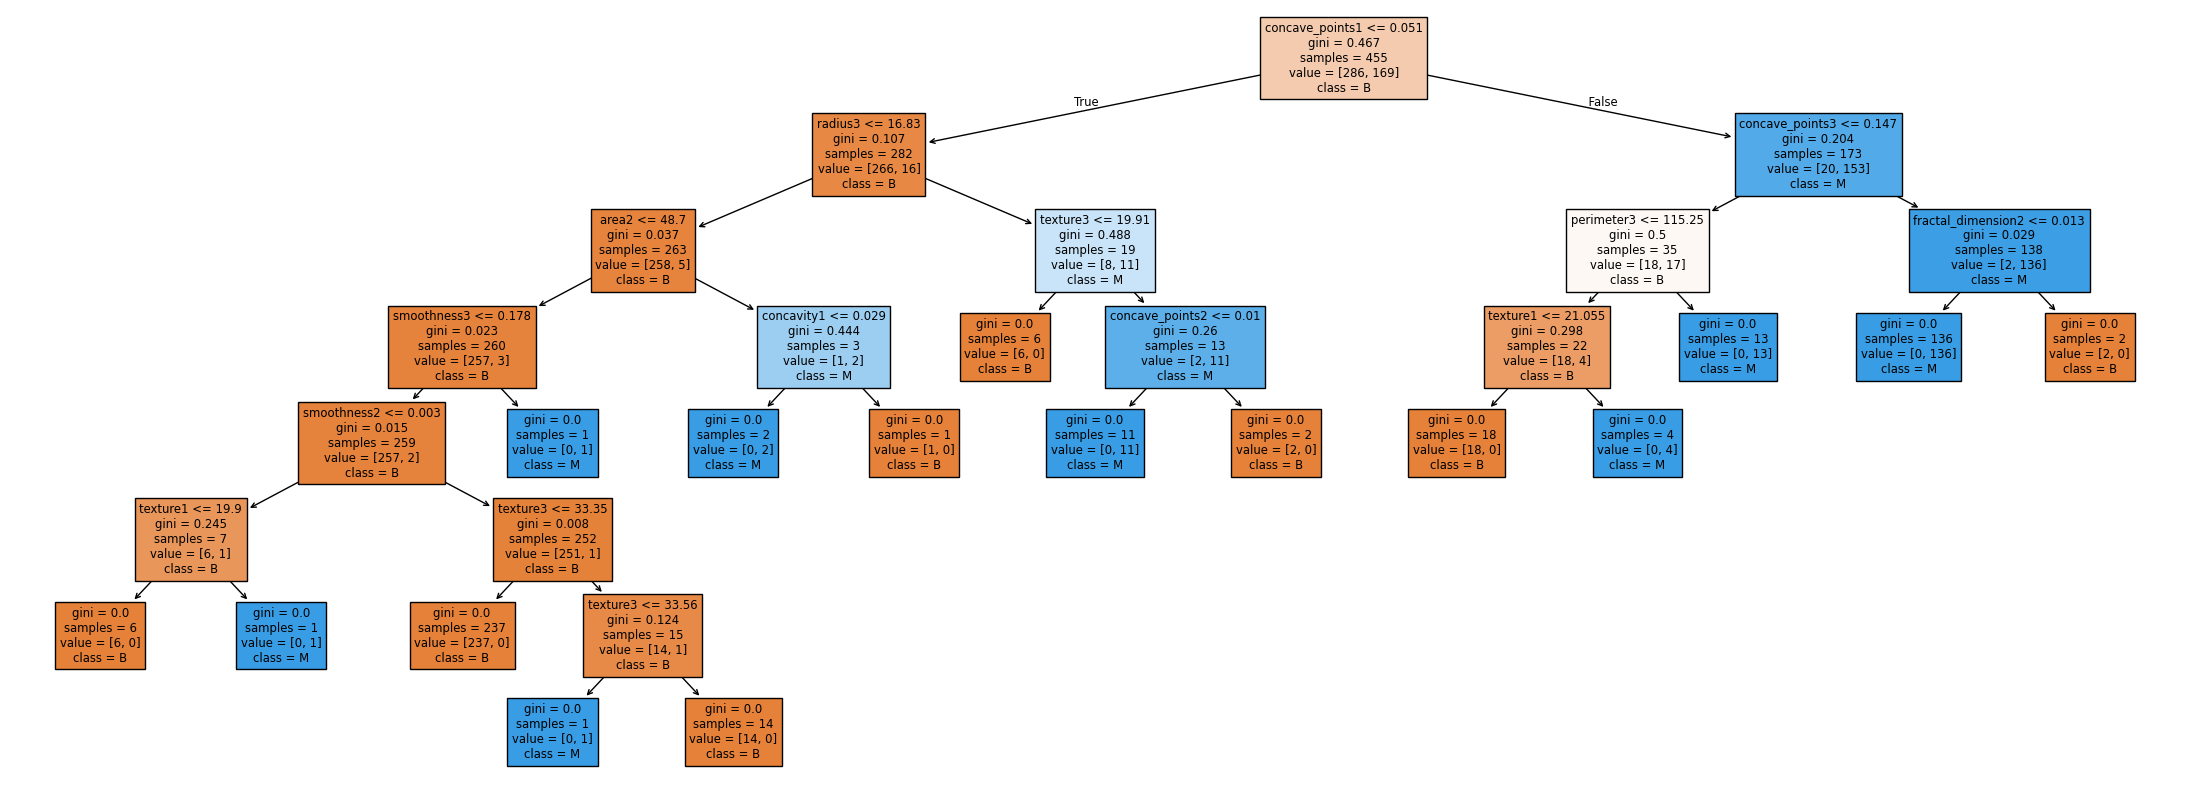

In [22]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(28,10))
plot_tree(dt,filled=True,feature_names=X_train.columns.tolist(),
          class_names=np.unique(Y).tolist())
plt.show()

In [23]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(
    n_estimators=100, #number of trees smaller dataset with fewer features 50 Larger dataset or high dimension 200 or 500
    criterion='gini', #default is gini or use entropy info gain dataset class imbalance or categorical features
    max_depth=None, # small dataset 5 or 10 prevent overfitting larger dataset None
    min_samples_split=2, # nosiy data 5 or 10
    min_samples_leaf=1, #for most of the dataset
    max_features='sqrt',#perform best split of features or log2 or fixed
    bootstrap=True,#small dataset make it to be false
    random_state=None    
    )

In [24]:
rf.fit(X_train,Y_train)
rf_pred=rf.predict(X_test)

In [25]:
important_feature=rf.feature_importances_
print(important_feature)

[0.03626764 0.01268236 0.04698047 0.03054326 0.00596868 0.00887907
 0.05047294 0.11952164 0.00311832 0.00659038 0.01641035 0.00565598
 0.0114033  0.03969917 0.00724324 0.00483244 0.00683962 0.00394772
 0.00345438 0.00781175 0.0952699  0.02115145 0.09649783 0.0964395
 0.01357023 0.01812456 0.03422677 0.17819936 0.01216877 0.00602893]


In [26]:
indices=np.argsort(important_feature)[::-1]
indices

array([27,  7, 22, 23, 20,  6,  2, 13,  0, 26,  3, 21, 25, 10, 24,  1, 28,
       12,  5, 19, 14, 16,  9, 29,  4, 11, 15, 17, 18,  8])

In [27]:
X.columns[indices.tolist()]

Index(['concave_points3', 'concave_points1', 'perimeter3', 'area3', 'radius3',
       'concavity1', 'perimeter1', 'area2', 'radius1', 'concavity3', 'area1',
       'texture3', 'compactness3', 'radius2', 'smoothness3', 'texture1',
       'symmetry3', 'perimeter2', 'compactness1', 'fractal_dimension2',
       'smoothness2', 'concavity2', 'fractal_dimension1', 'fractal_dimension3',
       'smoothness1', 'texture2', 'compactness2', 'concave_points2',
       'symmetry2', 'symmetry1'],
      dtype='object')

In [29]:
indices.tolist()
col=[]
for i in indices.tolist():
    print(X.columns[i])
    col.append(X.columns[i])

concave_points3
concave_points1
perimeter3
area3
radius3
concavity1
perimeter1
area2
radius1
concavity3
area1
texture3
compactness3
radius2
smoothness3
texture1
symmetry3
perimeter2
compactness1
fractal_dimension2
smoothness2
concavity2
fractal_dimension1
fractal_dimension3
smoothness1
texture2
compactness2
concave_points2
symmetry2
symmetry1


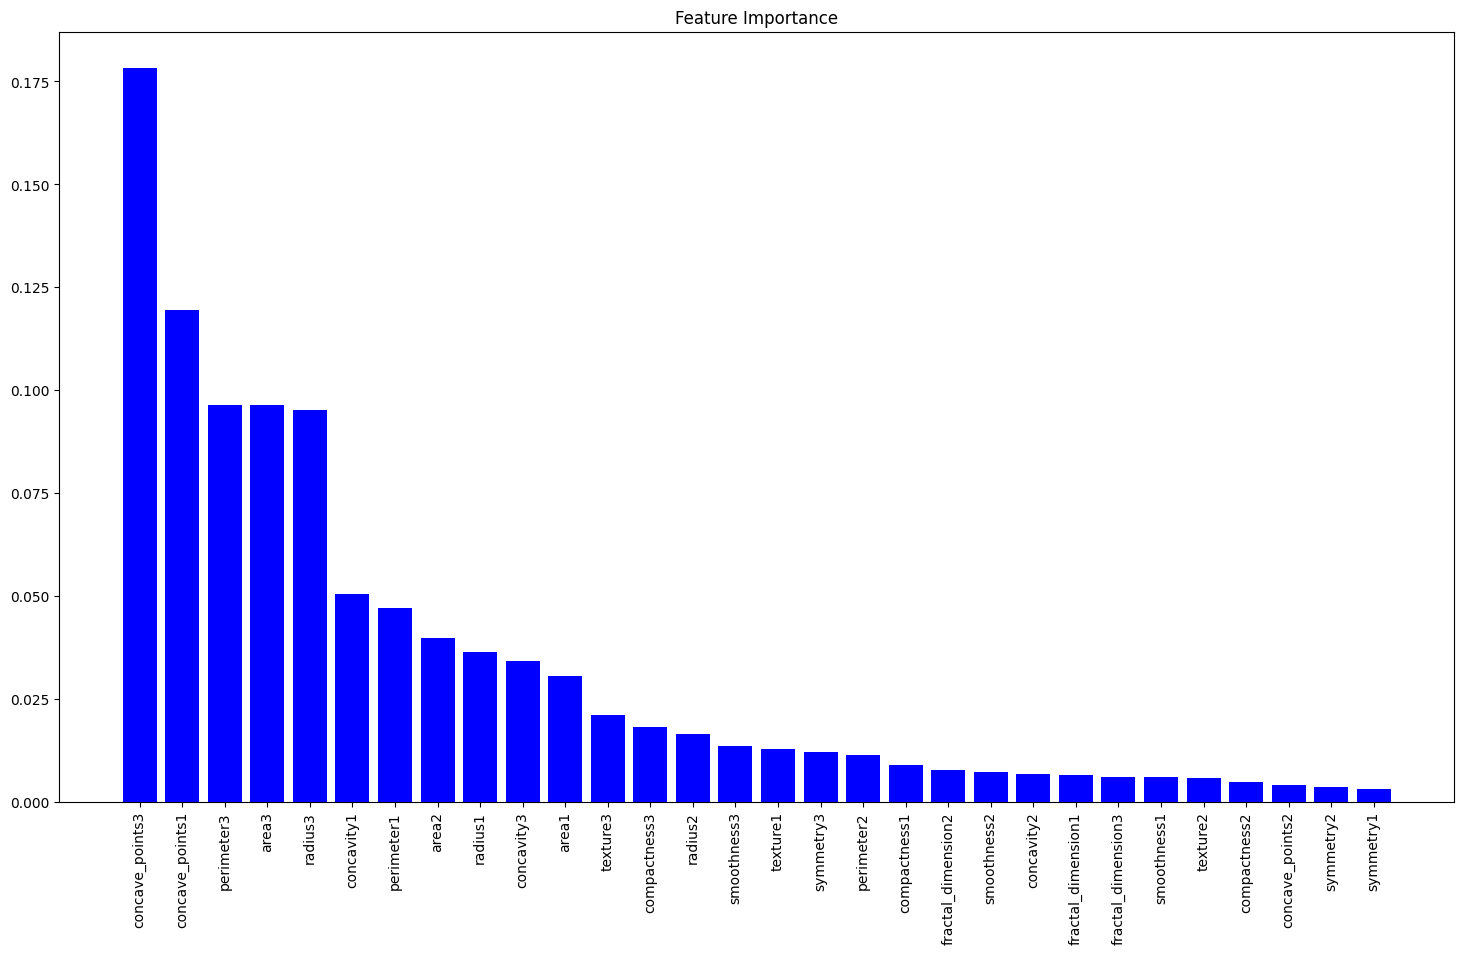

In [30]:
plt.figure(figsize=(18,10))
plt.title('Feature Importance')
plt.bar(col,important_feature[indices],color='b',align='center')
plt.xticks(rotation=90)
plt.show()

              precision    recall  f1-score   support

           0       0.96      0.97      0.97        71
           1       0.95      0.93      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

Accuracy score 0.956140350877193


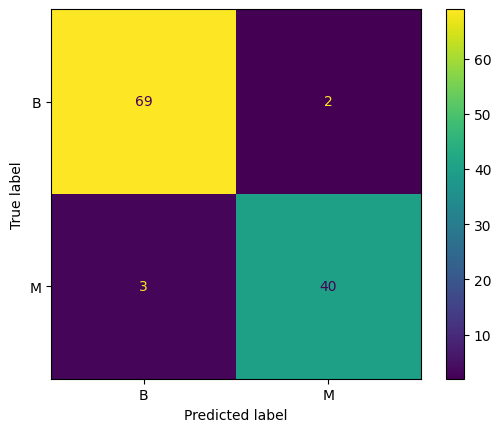

In [31]:
print(classification_report(Y_test,rf_pred))
print("Accuracy score", accuracy_score(Y_test,rf_pred))
cm=confusion_matrix(Y_test,rf_pred)
cmat=ConfusionMatrixDisplay(cm,display_labels=np.unique(Y).tolist())
cmat.plot()

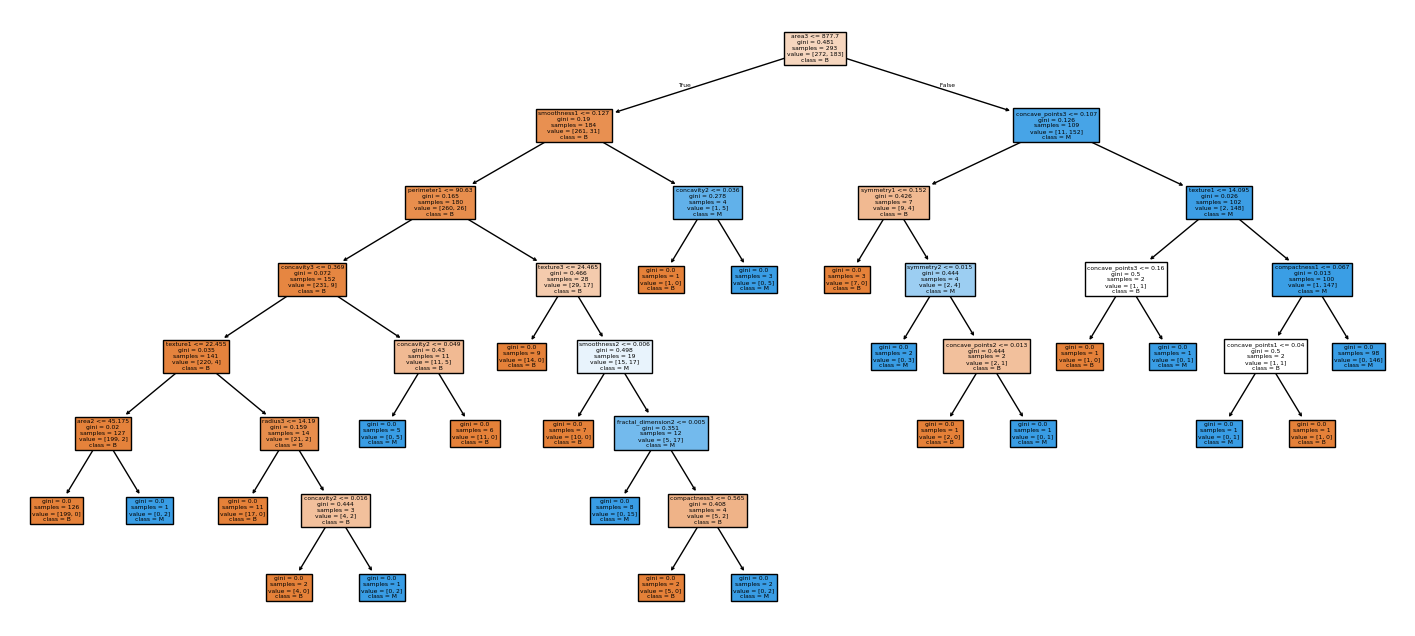

In [32]:
single_tree=rf.estimators_[1] #second tree to be visulaized
plt.figure(figsize=(18,8))
plot_tree(single_tree,filled=True,feature_names=X_train.columns.tolist(),
         class_names=np.unique(Y).tolist())
plt.show()

In [33]:
from sklearn.svm import SVC
svc=SVC(C=1.0,
       kernel='rbf',
       degree=3,
       gamma='scale',
       coef0=0.0,
       shrinking=True,
       probability=False,
       cache_size=200,
       class_weight=None,#[0.2,0.4] or balanced
        verbose=False,
        max_iter=1000,
        decision_function_shape='ovr',
        break_ties=False,
        random_state=None
        )

In [34]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train_scaled=sc.fit_transform(X_train_selected)
X_test_scaled=sc.transform(X_test_selected)
svc.fit(X_train_scaled,Y_train)
s_pred=svc.predict(X_test_scaled)
print(confusion_matrix(Y_test,s_pred))
print(accuracy_score(Y_test,s_pred))

[[69  2]
 [ 3 40]]
0.956140350877193
